In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

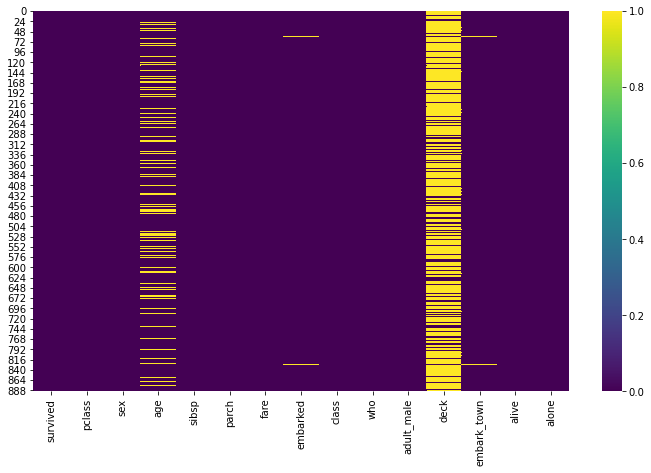

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cmap='viridis',cbar=True )

In [27]:
print(list(df.columns))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


<AxesSubplot:xlabel='age'>

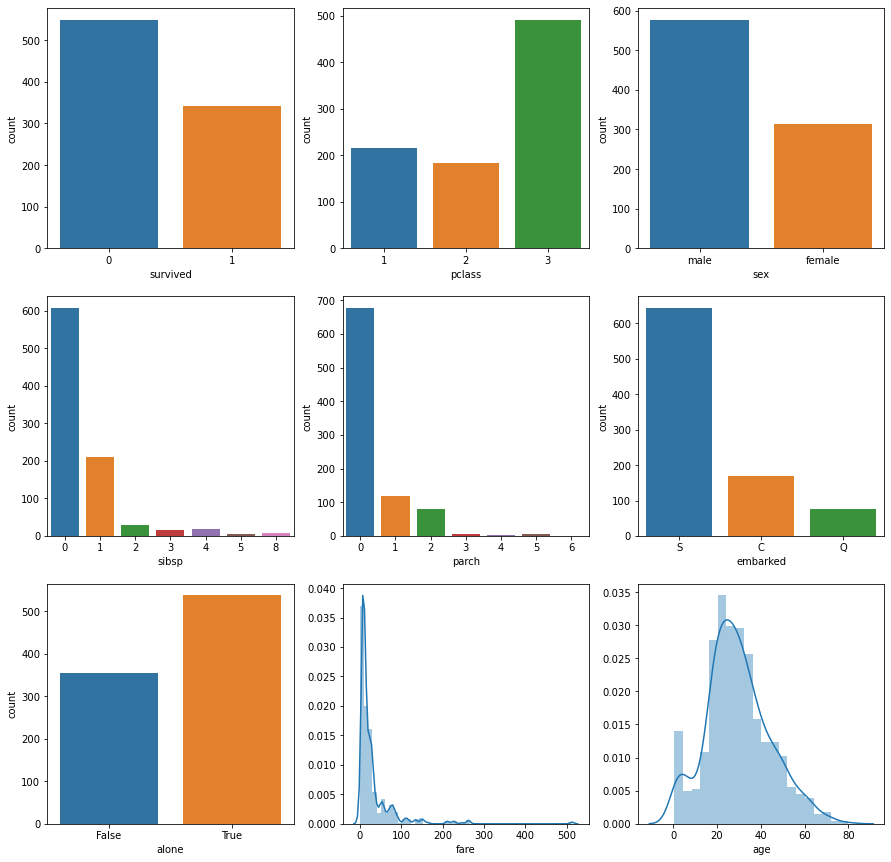

In [36]:
fig,ax =plt.subplots(3,3, figsize=(15,15))
sns.countplot('survived', data=df, ax =ax[0][0])
sns.countplot('pclass', data=df, ax =ax[0][1])
sns.countplot('sex', data=df, ax =ax[0][2])
sns.countplot('sibsp', data=df, ax =ax[1][0])
sns.countplot('parch', data=df, ax =ax[1][1])
sns.countplot('embarked', data=df, ax =ax[1][2])
sns.countplot('alone', data=df, ax =ax[2][0])

sns.distplot(df['fare'], kde=True ,ax = ax[2][1])
sns.distplot(df['age'], kde=True ,ax = ax[2][2])

In [37]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

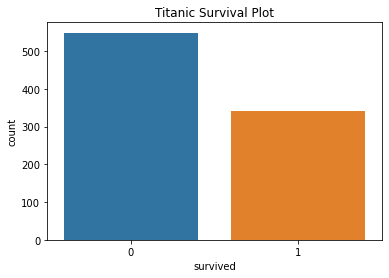

In [39]:
sns.countplot('survived',data=df)
plt.title('Titanic Survival Plot')
plt.show()

<AxesSubplot:ylabel='survived'>

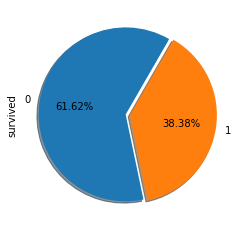

In [50]:
explode = (0.05,0)
df['survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow =True,explode = explode, startangle = 60)

In [53]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [57]:
df.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='count'>

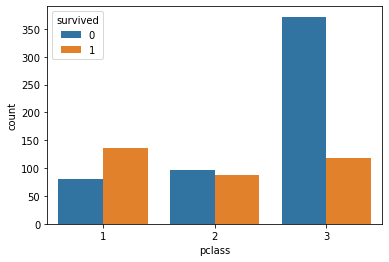

In [60]:
sns.countplot('pclass',data=df,hue='survived')

<AxesSubplot:ylabel='pclass'>

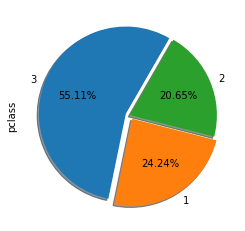

In [64]:
explode = (0.05,0.05,0)
df['pclass'].value_counts().plot.pie(autopct='%1.2f%%',shadow =True,explode = explode, startangle = 60)

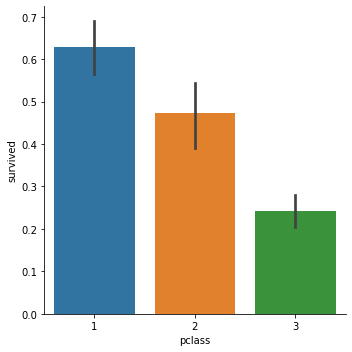

In [66]:
sns.catplot(x='pclass',y='survived', kind = 'bar',data=df)

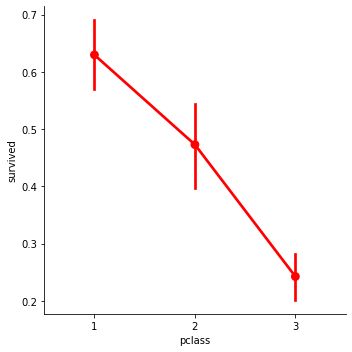

In [71]:
sns.catplot(x='pclass',y='survived', kind = 'point',data=df,color='red')

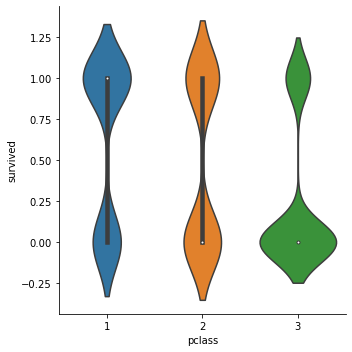

In [70]:
sns.catplot(x='pclass',y='survived', kind = 'violin',data=df)

In [78]:
df.groupby(['sex','survived'])['survived'].value_counts()

sex     survived  survived
female  0         0            81
        1         1           233
male    0         0           468
        1         1           109
Name: survived, dtype: int64

<AxesSubplot:ylabel='sex'>

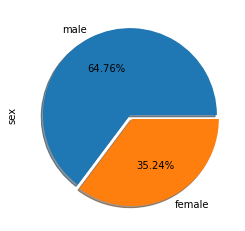

In [90]:
explode = (0,0.05)
df['sex'].value_counts().plot.pie(autopct='%1.2f%%',shadow = True,explode= explode)

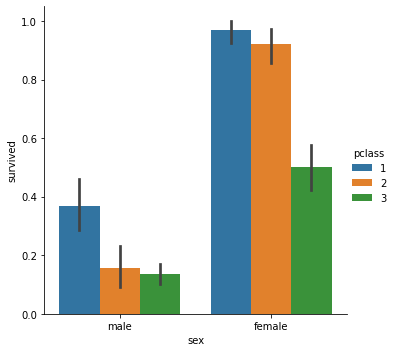

In [97]:
sns.catplot(x='sex',y='survived',data=df,hue='pclass',kind='bar')

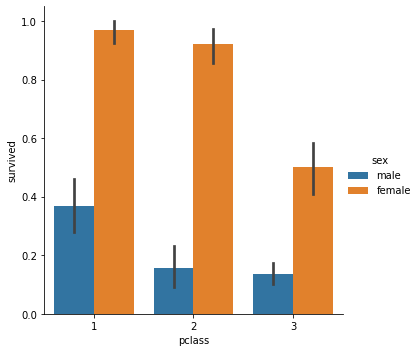

In [100]:
sns.catplot(x='pclass',y='survived',data=df,hue='sex',kind='bar')

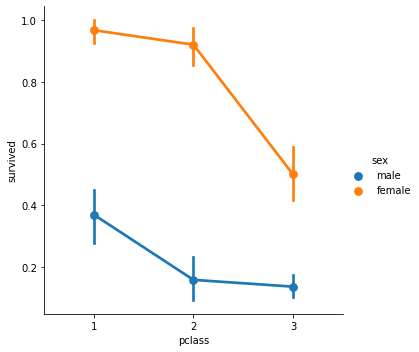

In [101]:
sns.catplot(x='pclass',y='survived',data=df,hue='sex',kind='point')

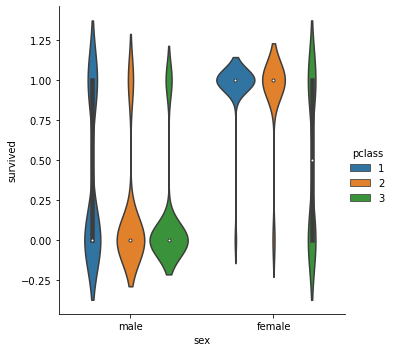

In [105]:
sns.catplot(x='sex',y='survived',data=df,hue='pclass',kind='violin')

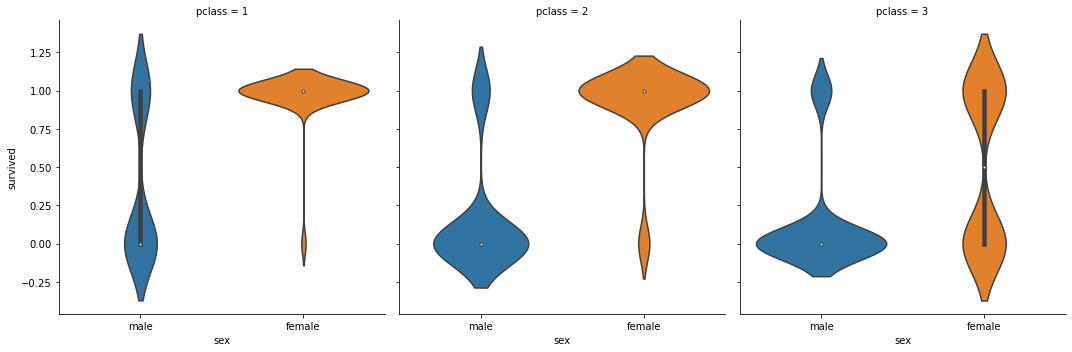

In [104]:
sns.catplot(x='sex',y='survived',data=df,col='pclass',kind='violin')

<AxesSubplot:>

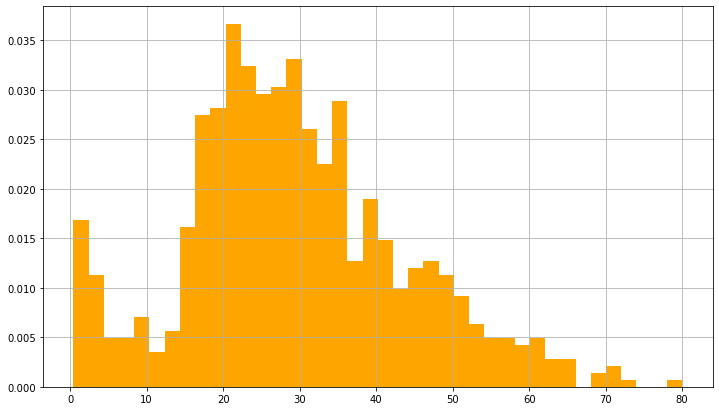

In [118]:
df['age'].hist(bins=40,density = True, color='orange',figsize = (12,7))

<AxesSubplot:xlabel='age'>

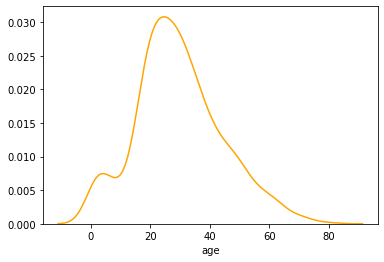

In [123]:
sns.distplot(df['age'],hist=False,color='orange')


<AxesSubplot:>

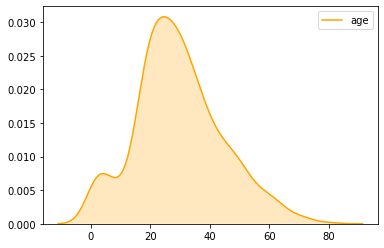

In [125]:
sns.kdeplot(df['age'],shade=True,color='orange')

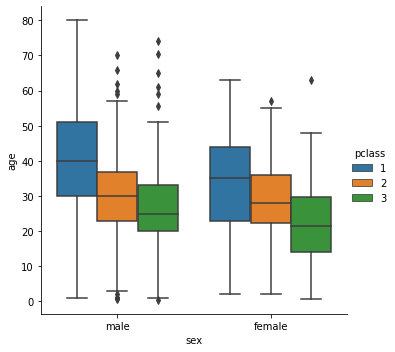

In [129]:
sns.catplot(x='sex',y='age',data=df,kind='box',hue = 'pclass')

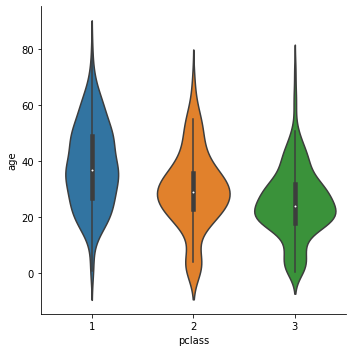

In [130]:
sns.catplot(x='pclass',y='age',data=df,kind='violin')

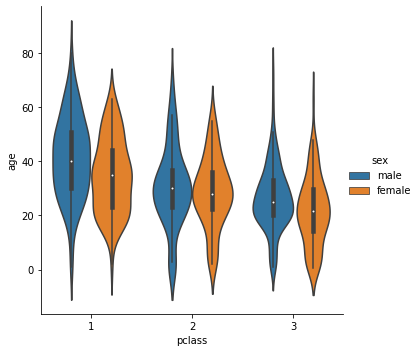

In [135]:
sns.catplot(x='pclass',y='age',data=df,kind='violin',hue='sex')

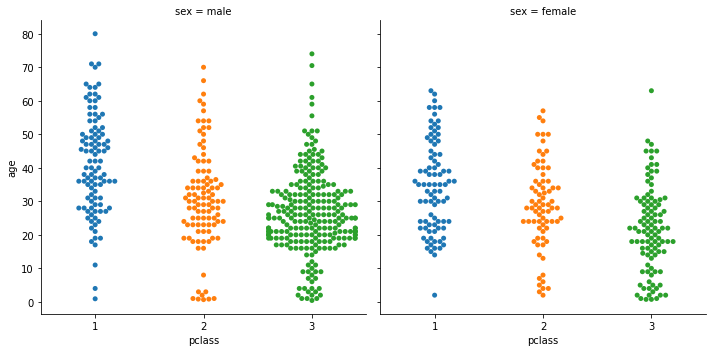

In [139]:
sns.catplot(x='pclass',y='age',data=df,kind='swarm',col='sex')

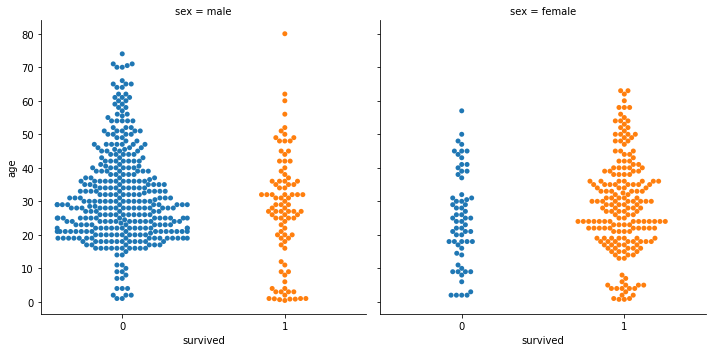

In [144]:
sns.catplot(x='survived',y='age',data=df,kind='swarm',col='sex')

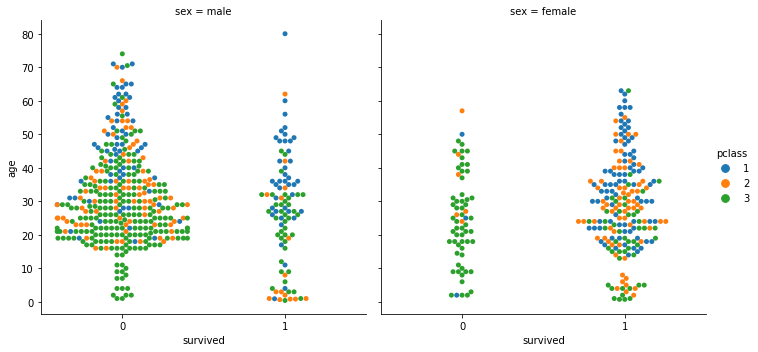

In [145]:
sns.catplot(x='survived',y='age',data=df,kind='swarm',col='sex',hue='pclass')

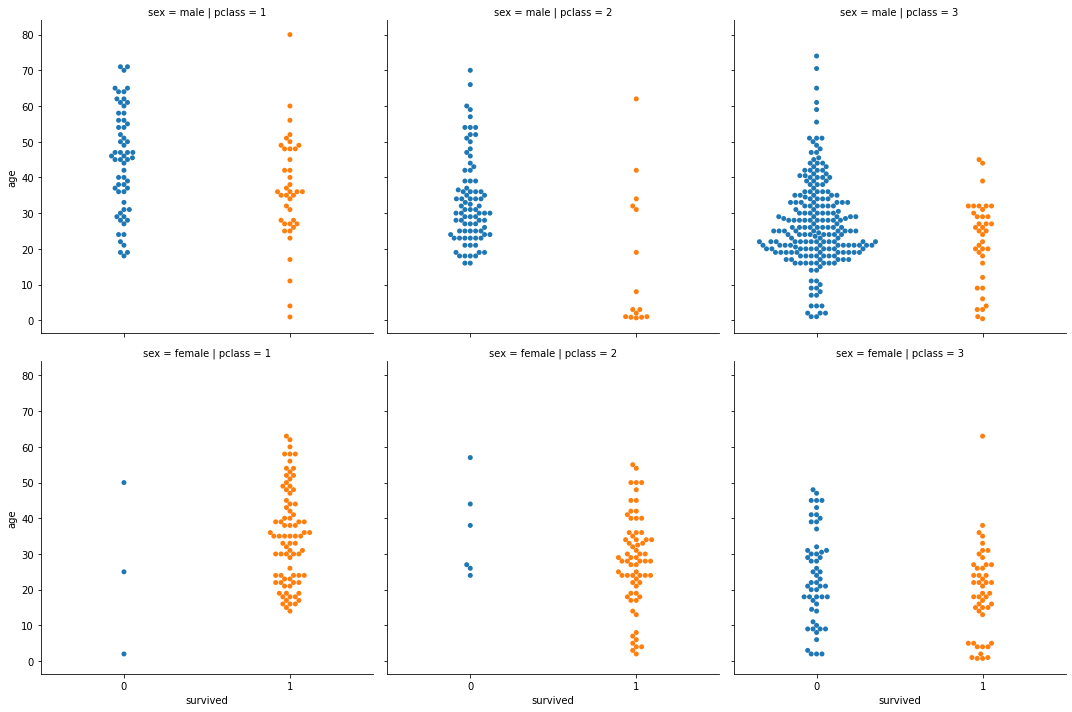

In [147]:
sns.catplot(x='survived',y='age',data=df,kind='swarm',row='sex',col='pclass')

<AxesSubplot:>

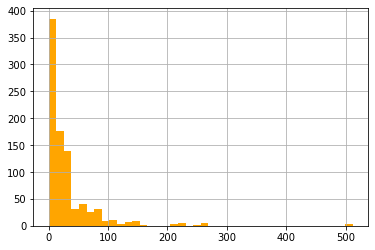

In [149]:
df['fare'].hist(bins=40,color='orange')

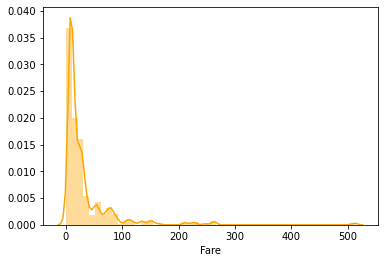

In [152]:
sns.distplot(df['fare'],color='orange')
plt.xlabel('Fare')
plt.show()

<AxesSubplot:>

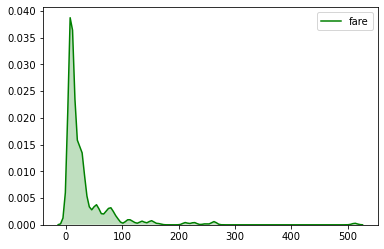

In [155]:
sns.kdeplot(df['fare'],color='green',shade=True)

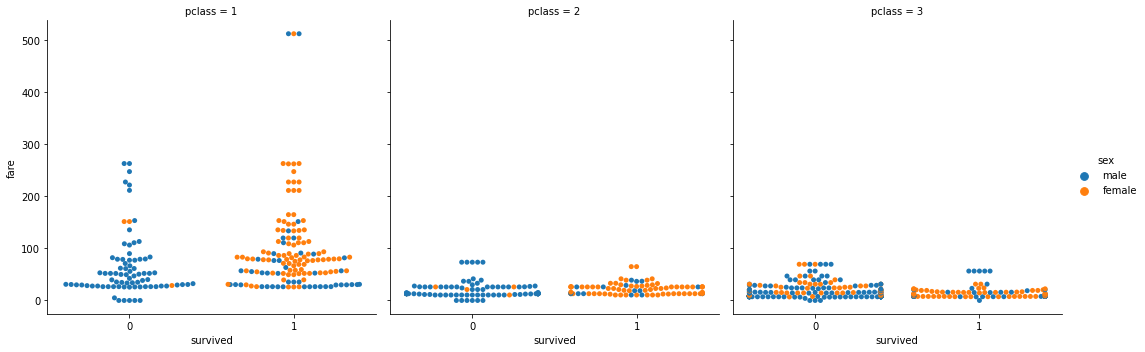

In [158]:
sns.catplot(x='survived',y='fare',data=df,kind='swarm',col='pclass',hue='sex')

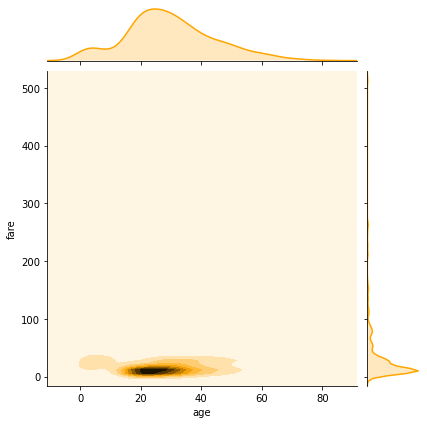

In [161]:
sns.jointplot(x='age',y='fare',data=df,kind='kde',color='orange')

In [162]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot:xlabel='sibsp', ylabel='count'>

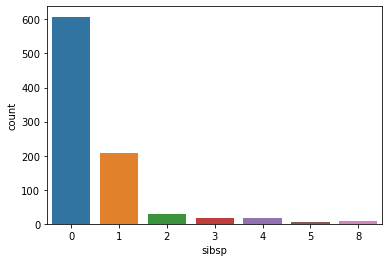

In [163]:
sns.countplot('sibsp',data=df)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

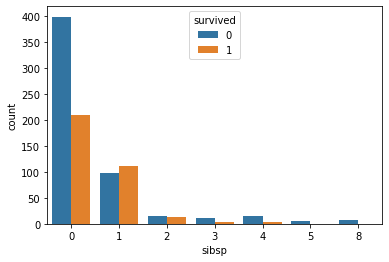

In [165]:
sns.countplot('sibsp',data=df,hue='survived')

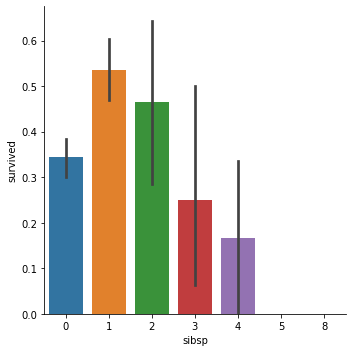

In [166]:
sns.catplot(x='sibsp',y = 'survived',kind='bar',data=df)

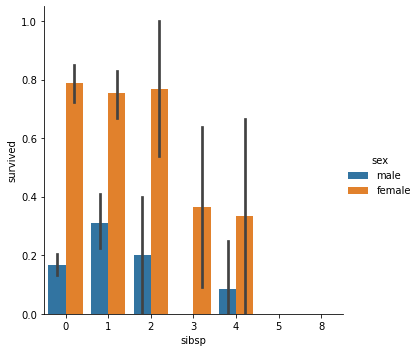

In [167]:
sns.catplot(x='sibsp',y = 'survived',kind='bar',data=df,hue = 'sex')

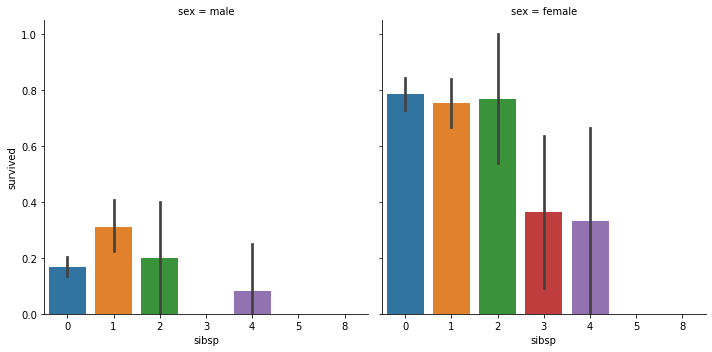

In [168]:
sns.catplot(x='sibsp',y = 'survived',kind='bar',data=df,col = 'sex')

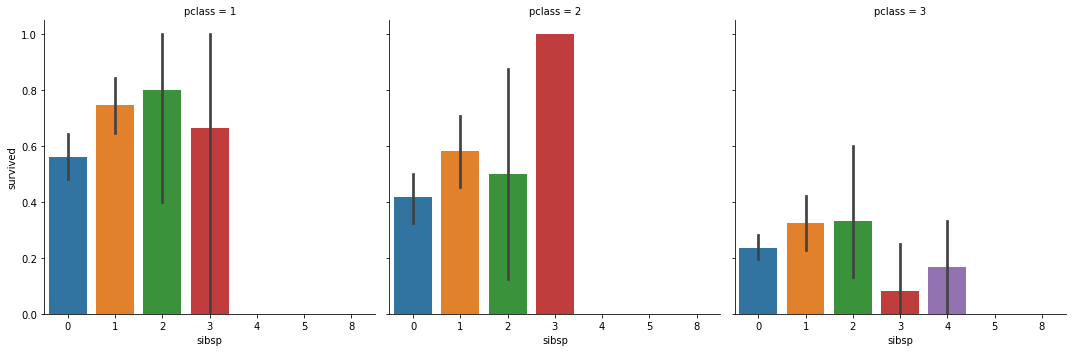

In [169]:
sns.catplot(x='sibsp',y = 'survived',kind='bar',data=df,col = 'pclass')

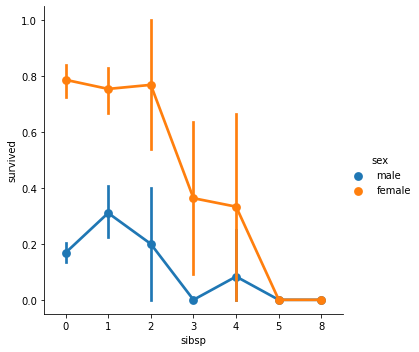

In [170]:
sns.catplot(x='sibsp',y = 'survived',kind='point',data=df,hue = 'sex')

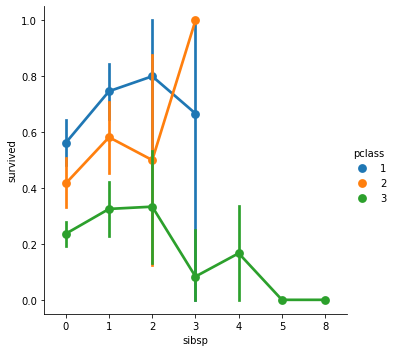

In [171]:
sns.catplot(x='sibsp',y = 'survived',kind='point',data=df,hue = 'pclass')

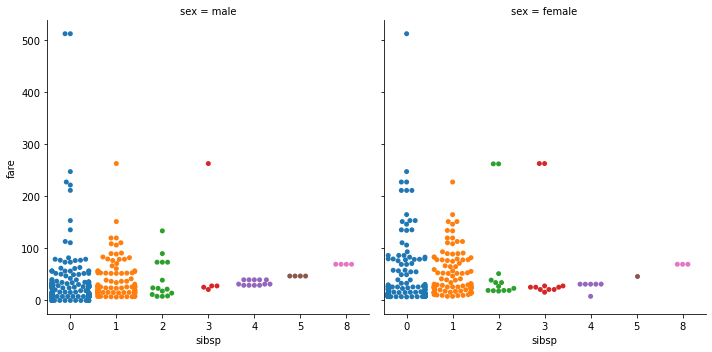

In [173]:
sns.catplot(x='sibsp',y = 'fare',kind='swarm',data=df,col = 'sex')

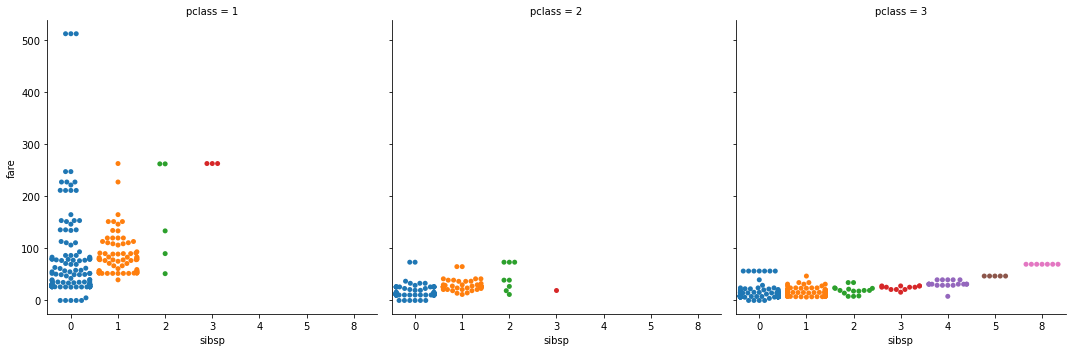

In [174]:
sns.catplot(x='sibsp',y = 'fare',kind='swarm',data=df,col = 'pclass')

In [175]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='parch', ylabel='count'>

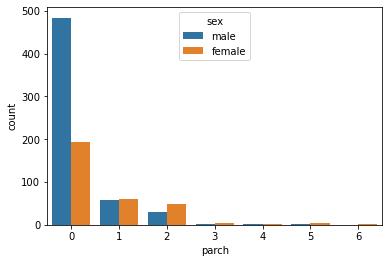

In [179]:
sns.countplot('parch',data=df,hue='sex')

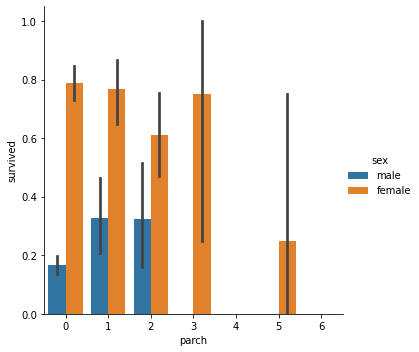

In [182]:
sns.catplot(x='parch',y='survived',data=df,kind='bar',hue='sex')

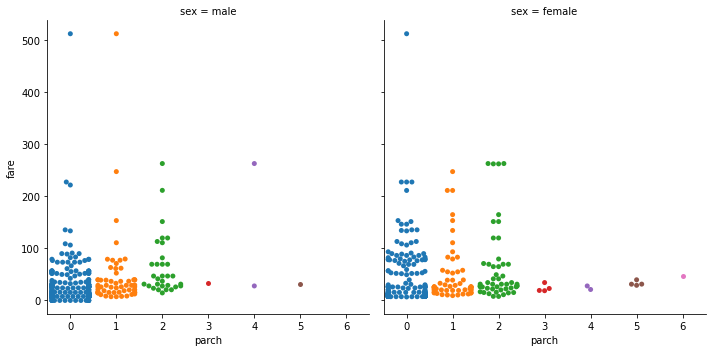

In [189]:
sns.catplot(x='parch',y='fare',data=df,col='sex',kind='swarm')

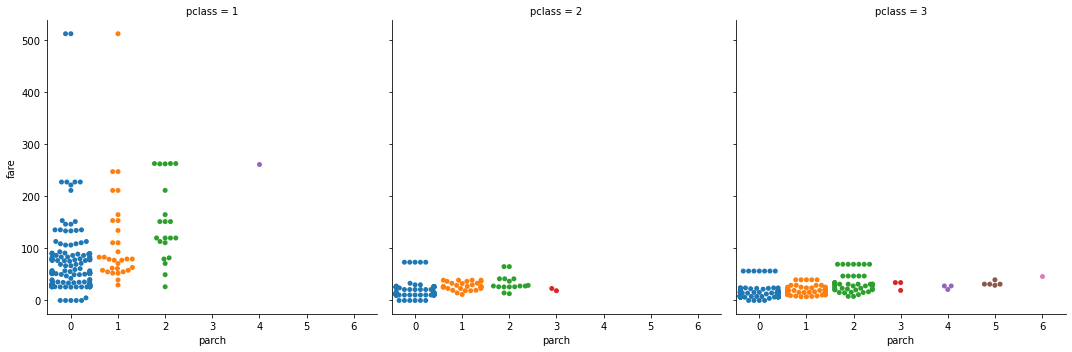

In [190]:
sns.catplot(x='parch',y='fare',data=df,col='pclass',kind='swarm')

In [191]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

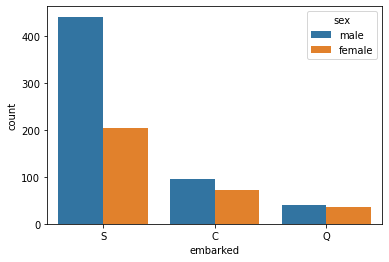

In [193]:
sns.countplot('embarked',data=df,hue='sex')

<AxesSubplot:ylabel='embarked'>

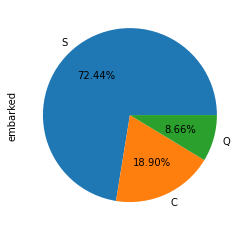

In [199]:
df['embarked'].value_counts().plot.pie(autopct = '%1.2f%%')

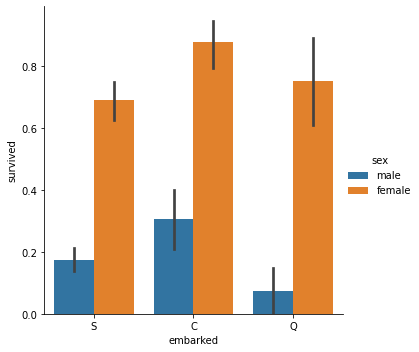

In [206]:
sns.catplot(x = 'embarked', y = 'survived',data=df,hue='sex',kind='bar')

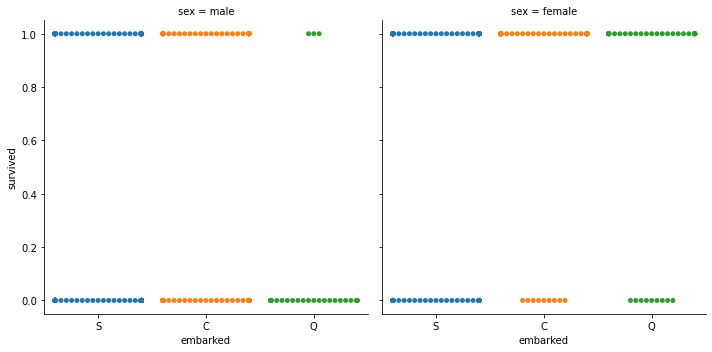

In [207]:
sns.catplot(x = 'embarked', y = 'survived',data=df,col='sex',kind='swarm')

In [200]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

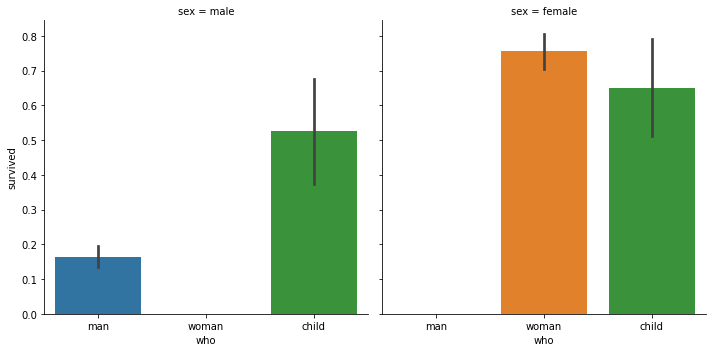

In [209]:
sns.catplot(x = 'who', y = 'survived',data=df,col='sex',kind='bar')

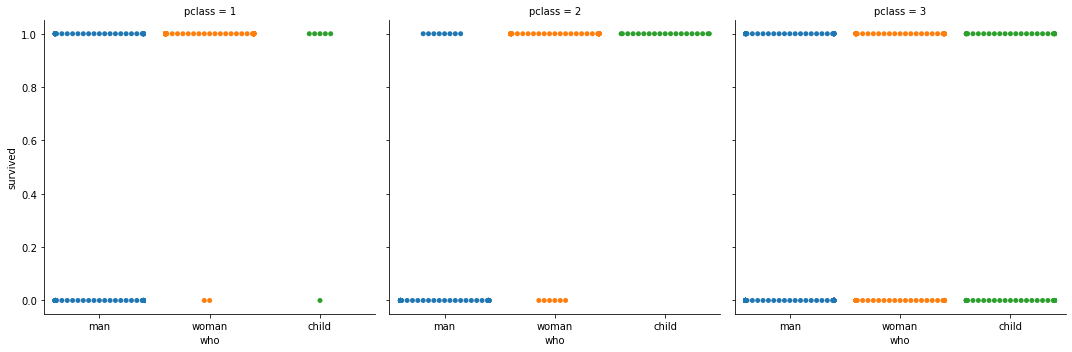

In [210]:
sns.catplot(x = 'who', y = 'survived',data=df,col='pclass',kind='swarm')

<AxesSubplot:ylabel='who'>

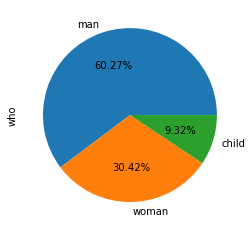

In [201]:
df['who'].value_counts().plot.pie(autopct = '%1.2f%%')